# Sentiment Classification on Amazon Reviews Dataset 

In this project , I did the following things:
1. Analyzed the Amazon Fine Food Reviews dataset, which contains 568,454 food reviews.
2. Preprocessed the review text by stemming, removing punctuations and stopwords, and created a weighted matrix using count matrix and TFIDF method in Python.  Clustered sentiment based on customer rating socre.
3. Build a classification model for customers’ sentiment using naïve bayes, logistic regression and random forest in Python. Determined the accuracy with the largest AUC equaling to 0.88.
4. Visualized the keywords of positive and negative sentiment by drafting word clouds in R.


In [62]:
# load packages
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import nltk

In [63]:
import string
import matplotlib.pyplot as plt

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
# convert a collection of text into a matrix of token counts
from sklearn.feature_extraction.text import TfidfTransformer 
# Transform a count matrix to a normalized tf-idf representation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc


In [65]:
# connect the database and import the data into Python
con = sqlite3.connect("/Users/suruisun/Downloads/kaggle/amazon-fine-foods-2/database.sqlite")


In [66]:
messages = pd.read_sql_query("""select Score, Summary from Reviews where Score!=3""",con)

As we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "postive". Otherwise, it will be set to "negative".

In [67]:
def participation(x):
    if x < 3:
        return "positive"
    return "negative"

messages.head(2)

Score                Summary
0      5  Good Quality Dog Food
1      1      Not as Advertised

In [68]:
Score = messages['Score']
Score = Score.map(participation)
Summary = messages['Summary']
X_train, X_test, y_train, y_test = train_test_split(Summary,Score,test_size=0.2,random_state=42) # train_test_split

In [69]:
print(messages.head(20))

    Score                                            Summary
0       5                              Good Quality Dog Food
1       1                                  Not as Advertised
2       4                              "Delight" says it all
3       2                                     Cough Medicine
4       5                                        Great taffy
5       4                                         Nice Taffy
6       5      Great!  Just as good as the expensive brands!
7       5                             Wonderful, tasty taffy
8       5                                         Yay Barley
9       5                                   Healthy Dog Food
10      5                    The Best Hot Sauce in the World
11      5  My cats LOVE this "diet" food better than thei...
12      1               My Cats Are Not Fans of the New Food
13      4                                  fresh and greasy!
14      5                       Strawberry Twizzlers - Yummy
15      5           Lots

In [70]:
tmp = messages
tmp['Score'] = tmp['Score'].map(participation)
print(tmp.head(20))


       Score                                            Summary
0   negative                              Good Quality Dog Food
1   positive                                  Not as Advertised
2   negative                              "Delight" says it all
3   positive                                     Cough Medicine
4   negative                                        Great taffy
5   negative                                         Nice Taffy
6   negative      Great!  Just as good as the expensive brands!
7   negative                             Wonderful, tasty taffy
8   negative                                         Yay Barley
9   negative                                   Healthy Dog Food
10  negative                    The Best Hot Sauce in the World
11  negative  My cats LOVE this "diet" food better than thei...
12  positive               My Cats Are Not Fans of the New Food
13  negative                                  fresh and greasy!
14  negative                       Straw

In [21]:
"""from nltk.corpus import stopwords
Words = stopwords.words('english')
Words = [word for word in Words if word not in ['not','no']]"""


In [71]:
X_train.head()

496497                                    ALMONDS GREAT BUY
225396    I never thought i'd have to say no to more fru...
288197                                   We love this Stuff
88450                                    Fan-friggen-tastic
354669                                     Great for office
Name: Summary, dtype: object

In [72]:
corpus = []
for text in X_train:
    text = text.lower()
    tokens = text.split()
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    corpus.append(text)

In [50]:
"""corpus1 = []
for line in corpus:
    words = line.split()
    words = [word for word in words if word not in Words]
    line1 = ' '.join(words)
    corpus1.append(line1)"""

In [73]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus1)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [74]:
test_set = []
for text in X_test:
    text = text.lower()
    text = [char for char in text if char not in string.punctuation]
    text = text = ''.join(text)
    test_set.append(text)
    
"""test_set1 = []
for line in test_set:
    words = [word for word in words if word not in Words]
    line1 = ' '.join(words)
    test_set1.append(line1)"""

X_new_counts = count_vect.transform(test_set)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

from pandas import *
df = DataFrame({'Before':X_train,'After':corpus})
print(df.head(20))
prediction = dict()

                                                    After  \
496497                                  almonds great buy   
225396  i never thought id have to say no to more frui...   
288197                                 we love this stuff   
88450                                    fanfriggentastic   
354669                                   great for office   
331410                                what have they done   
456920                                     cry baby tears   
261055   good cereal with a few potential health concerns   
295869                                       a quick meal   
149914                                        good flavor   
368576                                best bbq sauce ever   
192328                       best lemonade mix ive bought   
123408   if you like the taste of chai you will love this   
114477              the best basic ramen noodle out there   
108795                                           huge bag   
315703                  

In [75]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf,y_train)
prediction['Multinomial']=model.predict(X_test_tfidf)

In [76]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf,y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

In [77]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train_tfidf,y_train)
prediction['Logistic']=logreg.predict(X_test_tfidf)

In [81]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC(n_estimators=10)

In [82]:
result = model.fit(X_train_tfidf,y_train)

In [83]:
prediction['Random_Forest']= model.predict(X_test_tfidf)

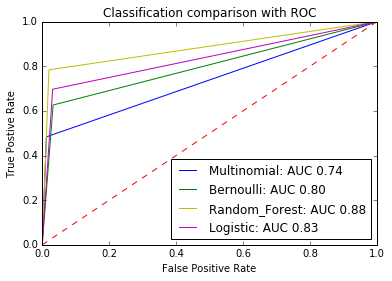

In [84]:
def format(x):
    if x=='positive':
        return 1
    return 0
vfunc = np.vectorize(format)

cmp = 0
colors = ['b','g','y','m','p','k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(format),vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp],label = "%s: AUC %0.2f"%(model,roc_auc))
    cmp += 1

plt.title('Classification comparison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1,2])
plt.ylabel('True Postive Rate')
plt.xlabel('False Positive Rate')
plt.show()


             precision    recall  f1-score   support

   positive       0.95      0.97      0.96     88784
   negative       0.80      0.70      0.75     16379

avg / total       0.92      0.93      0.92    105163



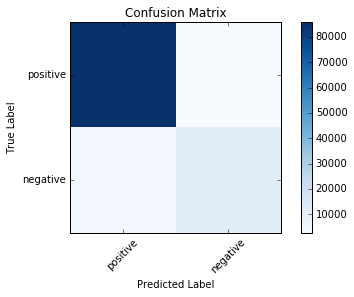

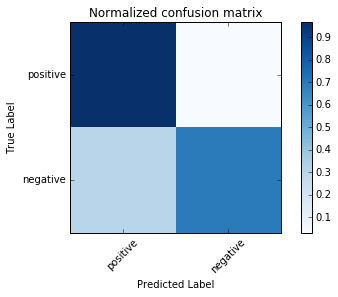

In [85]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))
def plot_confusion_matrix(cm,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(Score)))
    plt.xticks(tick_marks,set(Score),rotation=45)
    plt.yticks(tick_marks,set(Score))
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
cm = confusion_matrix(y_test,prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)
cm_normalized = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized,title='Normalized confusion matrix')
plt.show()

    
    
    